# Pandas: Visualization 

For more cf. [Pandas Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Plotting Features

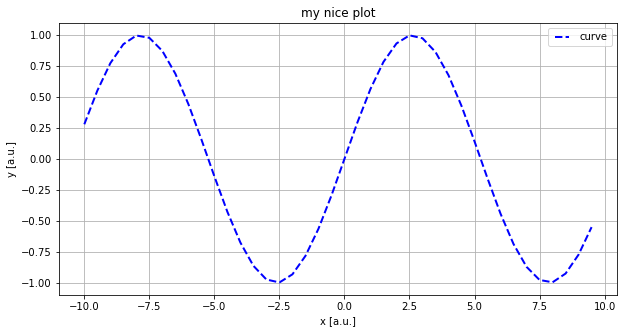

In [2]:
plt.figure(figsize=(10,5))

x = np.arange(start =-10, stop = 10, step=0.5)
y = np.sin(.6*x)

plt.plot(x, y, '--b', linewidth=2, label='curve')

plt.title('my nice plot')
plt.xlabel('x [a.u.]')
plt.ylabel('y [a.u.]')
plt.legend(loc='best', numpoints=3)
plt.grid()

plt.savefig('abbildungen/my_plot.pdf')

## Random Walk with Series

In [3]:
dates = pd.date_range('2000-01-01', '2001-01-01', freq='B')
ts = pd.Series(np.random.randn(len(dates)), index=dates)
ts.head()

2000-01-03   -1.937971
2000-01-04   -1.608632
2000-01-05    0.995109
2000-01-06    0.585874
2000-01-07   -1.096563
Freq: B, dtype: float64

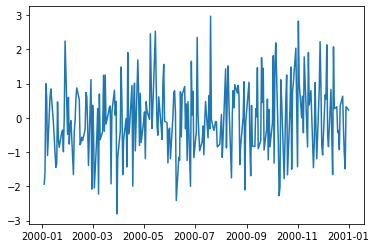

In [4]:
plt.plot(ts);

This can be plotted nicer using pandas plot method:

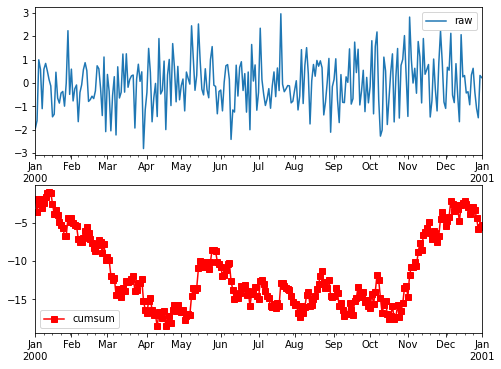

In [5]:
plt.figure(figsize=(8,6))
plt.grid()

plt.subplot(2,1,1)
ts.plot(label='raw')
plt.legend()

plt.subplot(2,1,2)
ts.cumsum().plot(style='s-r', label='cumsum')
plt.legend();

In [6]:
df = pd.DataFrame({'raw':ts, 'cumsum':ts.cumsum()}, columns=['raw','cumsum'])
df.tail()

raw    cumsum
2000-12-26 -0.387739 -3.295562
2000-12-27 -1.084431 -4.379994
2000-12-28 -1.486396 -5.866390
2000-12-29  0.324975 -5.541415
2001-01-01  0.232896 -5.308519

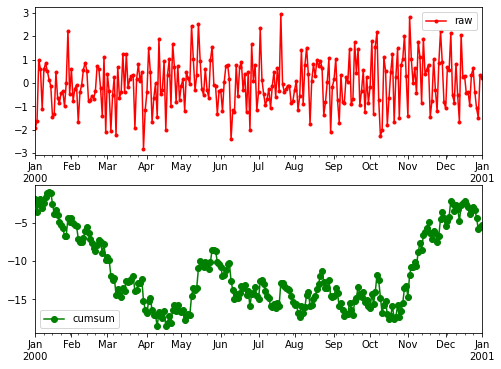

In [7]:
df.plot(figsize=(8,6), subplots=True, style=['.-r','o-g'], sharex=False);

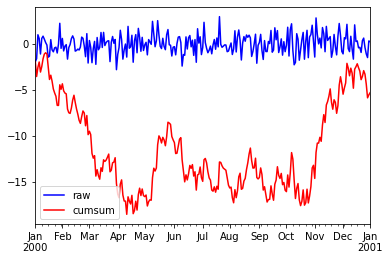

In [8]:
df.plot(style=['b','r']);

## Bar Plots

**Bar Plots of Series:**

In [9]:
s = pd.Series(np.random.rand(4), index=['A','B','C','D'])
s

A    0.975419
B    0.783120
C    0.179799
D    0.329541
dtype: float64

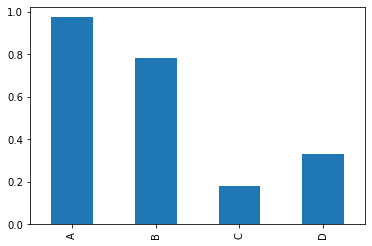

In [10]:
s.plot(kind='bar');

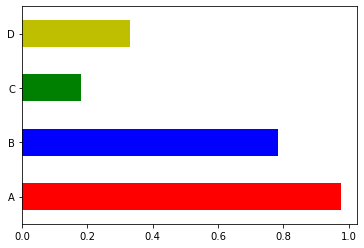

In [11]:
s.plot(kind='barh', color=['r','b','g','y']);

***Bar Plots of Data Frames:**

In [12]:
df = pd.DataFrame(np.random.rand(6,4), 
                  index=['one','two','three','four','five','six'],
                  columns=['A','B','C','D'])
df

A         B         C         D
one    0.644767  0.589178  0.194317  0.085825
two    0.576538  0.451156  0.261371  0.827752
three  0.986044  0.423340  0.758170  0.903822
four   0.409372  0.669796  0.837473  0.844189
five   0.642838  0.792827  0.901498  0.790463
six    0.768217  0.977860  0.070680  0.109317

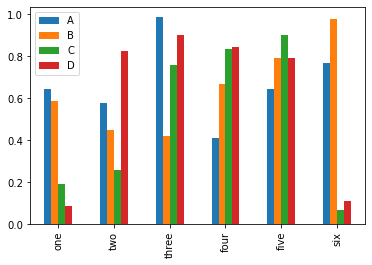

In [13]:
df.plot(kind='bar');

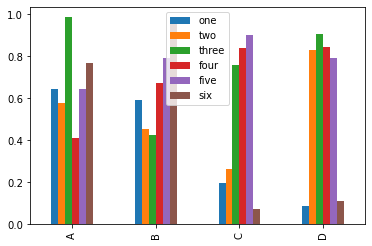

In [14]:
df.T.plot(kind='bar');

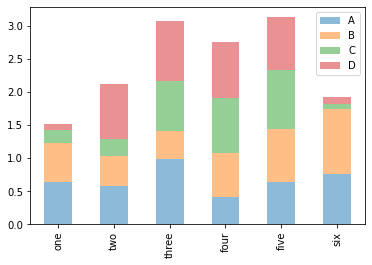

In [15]:
df.plot(kind='bar', stacked=True, alpha=0.5);

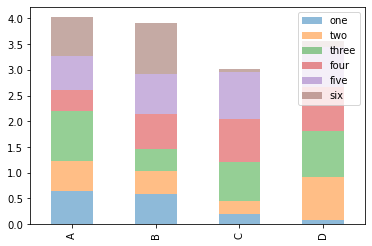

In [16]:
df.T.plot(kind='bar', stacked=True, alpha=0.5);

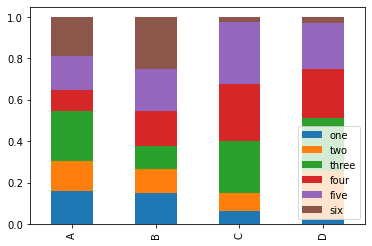

In [17]:
df2 = df/df.sum()
df2.T.plot(kind='bar', stacked=True, xlim= (0,6));

## Pie Plots

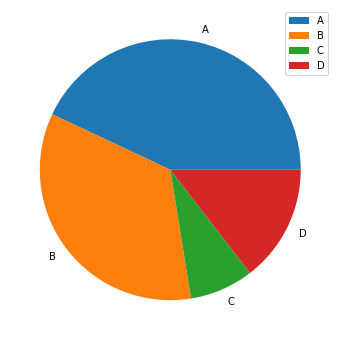

In [18]:
plt.figure(figsize=(6,6))
plt.pie(s, labels=s.index)
plt.legend();

## Histograms and Kernel Density Estimate

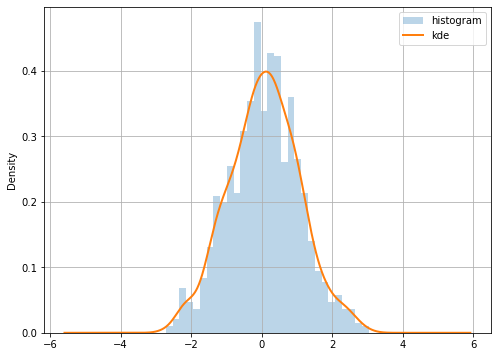

In [19]:
s = pd.Series(np.random.randn(1000))

plt.figure(figsize=(8,6))
s.hist(bins=30, density=True, alpha=0.3, label='histogram')
s.plot(kind='kde', label='kde', linewidth=2)
plt.grid(True)
plt.legend();

## Box and Scatter Plots

http://de.wikipedia.org/wiki/Boxplot

In [20]:
df = pd.read_excel('daten/dshistory2013.xls',sheet_name='Price (EUR)',skiprows=1,index_col=0)
df.head()

hEXA01 hEXA02  hEXA03  hEXA04  hEXA05  hEXA06  hEXA07  hEXA08  \
Delivery Date                                                                  
2013-12-31      20.00  17.26   15.66   12.00   12.00   17.61   22.96   27.04   
2013-12-30      19.67   13.5   11.44   11.00   12.63   18.75   30.00   33.90   
2013-12-29      16.99  10.56    7.48    7.13    7.30    9.65   14.35   17.49   
2013-12-28       9.00    5.6    2.39    3.20    3.77    7.54   11.58   18.93   
2013-12-27      20.90  20.03   15.87   14.93   17.58   21.13   23.43   28.44   

               hEXA09  hEXA10  ...  bEXAoff1\n(01-08)  bEXAoff2\n(21-24)  \
Delivery Date                  ...                                         
2013-12-31      33.05   36.15  ...              18.07              27.64   
2013-12-30      35.76   37.80  ...              18.86              34.53   
2013-12-29      19.59   25.55  ...              11.37              36.30   
2013-12-28      26.81   30.51  ...               7.75              32.26   
2013-12-27      32.87   33.93  ...              20.29              17.66   

               bEXAdream (01-06)  bEXAlunch (11-14)  bEXAteatime (17-20)  \
Delivery Date                                                              
2013-12-31                 15.76              32.06                37.40   
2013-12-30                 14.50              36.28                43.43   
2013-12-29                  9.85              31.53                40.95   
2013-12-28                  5.25              34.51                44.78   
2013-12-27                 18.41              32.62                33.50   

               bEXAmoon\n(01-04)  bEXAsun\n(05-08)  bEXAearlyt\n(09-10)  \
Delivery Date                                                             
2013-12-31                 16.23             19.90                34.60   
2013-12-30                 13.90             23.82                36.78   
2013-12-29                 10.54             12.20                22.57   
2013-12-28                  5.05             10.46                28.66   
2013-12-27                 17.93             22.65                33.40   

               bEXAlatet\n(15-16)  bEXAwakeup\n(07-08)  
Delivery Date                                           
2013-12-31                  32.00                25.00  
2013-12-30                  34.33                31.95  
2013-12-29                  29.43                15.92  
2013-12-28                  35.26                15.26  
2013-12-27                  29.92                25.94  

[5 rows x 38 columns]

**Find non-numeric values:** cf. [stackoverflow](http://stackoverflow.com/questions/21771133/finding-non-numeric-rows-in-dataframe-in-pandas)

The `applymap` method applies a function to each element in the data frame.

In [21]:
df.applymap(np.isreal).head()

hEXA01  hEXA02  hEXA03  hEXA04  hEXA05  hEXA06  hEXA07  hEXA08  \
Delivery Date                                                                   
2013-12-31       True    True    True    True    True    True    True    True   
2013-12-30       True    True    True    True    True    True    True    True   
2013-12-29       True    True    True    True    True    True    True    True   
2013-12-28       True    True    True    True    True    True    True    True   
2013-12-27       True    True    True    True    True    True    True    True   

               hEXA09  hEXA10  ...  bEXAoff1\n(01-08)  bEXAoff2\n(21-24)  \
Delivery Date                  ...                                         
2013-12-31       True    True  ...               True               True   
2013-12-30       True    True  ...               True               True   
2013-12-29       True    True  ...               True               True   
2013-12-28       True    True  ...               True               True   
2013-12-27       True    True  ...               True               True   

               bEXAdream (01-06)  bEXAlunch (11-14)  bEXAteatime (17-20)  \
Delivery Date                                                              
2013-12-31                  True               True                 True   
2013-12-30                  True               True                 True   
2013-12-29                  True               True                 True   
2013-12-28                  True               True                 True   
2013-12-27                  True               True                 True   

               bEXAmoon\n(01-04)  bEXAsun\n(05-08)  bEXAearlyt\n(09-10)  \
Delivery Date                                                             
2013-12-31                  True              True                 True   
2013-12-30                  True              True                 True   
2013-12-29                  True              True                 True   
2013-12-28                  True              True                 True   
2013-12-27                  True              True                 True   

               bEXAlatet\n(15-16)  bEXAwakeup\n(07-08)  
Delivery Date                                           
2013-12-31                   True                 True  
2013-12-30                   True                 True  
2013-12-29                   True                 True  
2013-12-28                   True                 True  
2013-12-27                   True                 True  

[5 rows x 38 columns]

If all in the row are True then they are all numeric:

In [22]:
df.applymap(np.isreal).all(1).head()

Delivery Date
2013-12-31    True
2013-12-30    True
2013-12-29    True
2013-12-28    True
2013-12-27    True
dtype: bool

Use the negation to index the data frame for those rows which have at least one non-real value:

In [23]:
df[~df.applymap(np.isreal).all(1)]

hEXA01       hEXA02  hEXA03  hEXA04  hEXA05  hEXA06  hEXA07  \
Delivery Date                                                                
2013-10-27       12.3  6,74 | 4,25     4.0     0.1    -0.2   -0.57    0.98   

               hEXA08  hEXA09  hEXA10  ...  bEXAoff1\n(01-08)  \
Delivery Date                          ...                      
2013-10-27       6.68    3.98    9.45  ...               3.81   

               bEXAoff2\n(21-24)  bEXAdream (01-06)  bEXAlunch (11-14)  \
Delivery Date                                                            
2013-10-27                 13.68                3.8               4.48   

               bEXAteatime (17-20)  bEXAmoon\n(01-04)  bEXAsun\n(05-08)  \
Delivery Date                                                             
2013-10-27                   21.25               5.48              1.72   

               bEXAearlyt\n(09-10)  bEXAlatet\n(15-16)  bEXAwakeup\n(07-08)  
Delivery Date                                                                
2013-10-27                    6.72               -5.75                 3.83  

[1 rows x 38 columns]

In [24]:
df.loc['2013-10-27','hEXA02'] = 5.1
df.loc['2013-10-27','hEXA02'] 

5.1

Use only the first 24 columns of month data and map all values to floating point numbers.

In [25]:
df = df.iloc[:,:24].applymap(float)
df.columns

Index(['hEXA01', 'hEXA02', 'hEXA03', 'hEXA04', 'hEXA05', 'hEXA06', 'hEXA07',
       'hEXA08', 'hEXA09', 'hEXA10', 'hEXA11', 'hEXA12', 'hEXA13', 'hEXA14',
       'hEXA15', 'hEXA16', 'hEXA17', 'hEXA18', 'hEXA19', 'hEXA20', 'hEXA21',
       'hEXA22', 'hEXA23', 'hEXA24'],
      dtype='object')

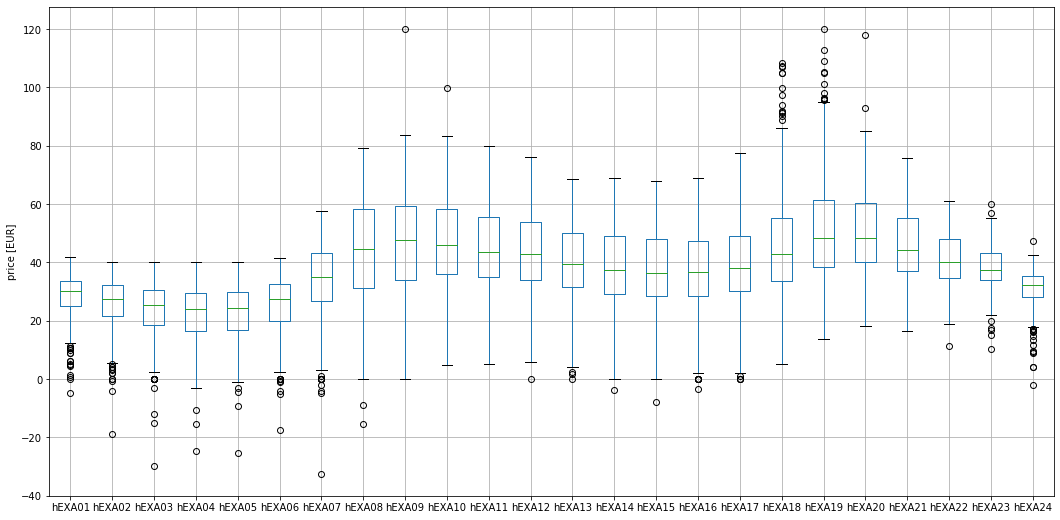

In [26]:
df.boxplot(figsize=(18,9))
plt.ylabel('price [EUR]');

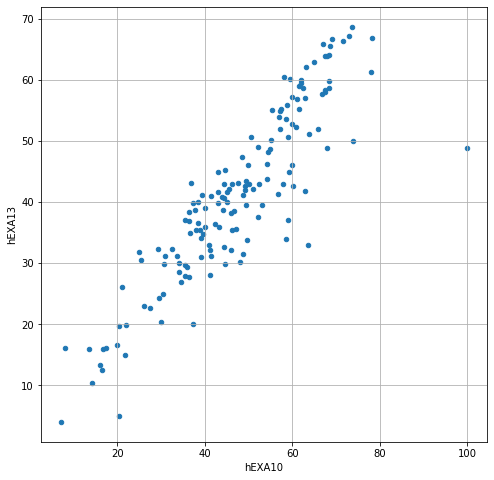

In [27]:
df.loc[:'2013-06-01'].plot(kind='scatter', x='hEXA10', y='hEXA13', figsize=(8,8));
plt.grid()

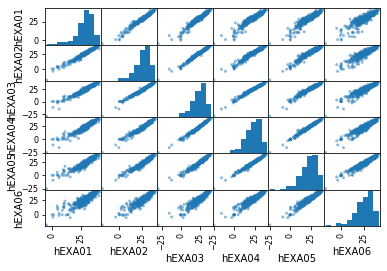

In [28]:
pd.plotting.scatter_matrix(df.iloc[:,:6]);

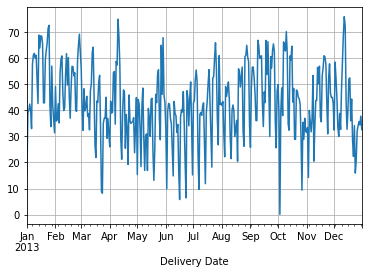

In [29]:
df['hEXA12'].plot();
plt.grid()

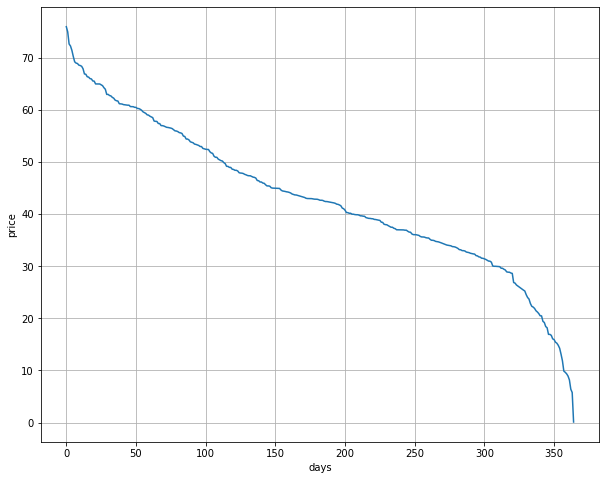

In [30]:
plt.figure(figsize=(10,8))
plt.plot(df['hEXA12'].sort_values(ascending=False).values)

plt.xlabel('days')
plt.ylabel('price')
plt.grid()